In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import pandas as pd
import os
import requests
from PIL import Image

In [3]:
test_dir="C:/Users/jpadmanabhan/Downloads/imgclass/dog vs cat/dataset/test_set" #getting our testing data
train_dir="C:/Users/jpadmanabhan/Downloads/imgclass/dog vs cat/dataset/training_set" #getting our training data

train_dir_cats = "C:/Users/jpadmanabhan/Downloads/imgclass/dog vs cat/dataset/training_set/cats" #storing the cats training images
train_dir_dogs = "C:/Users/jpadmanabhan/Downloads/imgclass/dog vs cat/dataset/training_set/dogs" #storing the dogs training images
test_dir_cats = "C:/Users/jpadmanabhan/Downloads/imgclass/dog vs cat/dataset/test_set/cats" #storing the cats testing images
test_dir_dogs = "C:/Users/jpadmanabhan/Downloads/imgclass/dog vs cat/dataset/test_set/dogs" #storing the dogs testing images

In [4]:
print('number of cats training images - ',len(os.listdir(train_dir_cats))) 
print('number of dogs training images - ',len(os.listdir(train_dir_dogs)))
print('number of cats testing images - ',len(os.listdir(test_dir_cats)))
print('number of dogs testing images - ',len(os.listdir(test_dir_dogs)))

number of cats training images -  4000
number of dogs training images -  4000
number of cats testing images -  1000
number of dogs testing images -  1000


### II-1 / visualisation of cats image

shape of the image 1 : (149, 150, 3)
shape of the image 2 : (499, 336, 3)
shape of the image 3 : (407, 379, 3)
shape of the image 4 : (269, 259, 3)
shape of the image 5 : (375, 499, 3)
shape of the image 6 : (333, 500, 3)
shape of the image 7 : (375, 499, 3)
shape of the image 8 : (374, 500, 3)
shape of the image 9 : (368, 328, 3)
shape of the image 10 : (400, 353, 3)


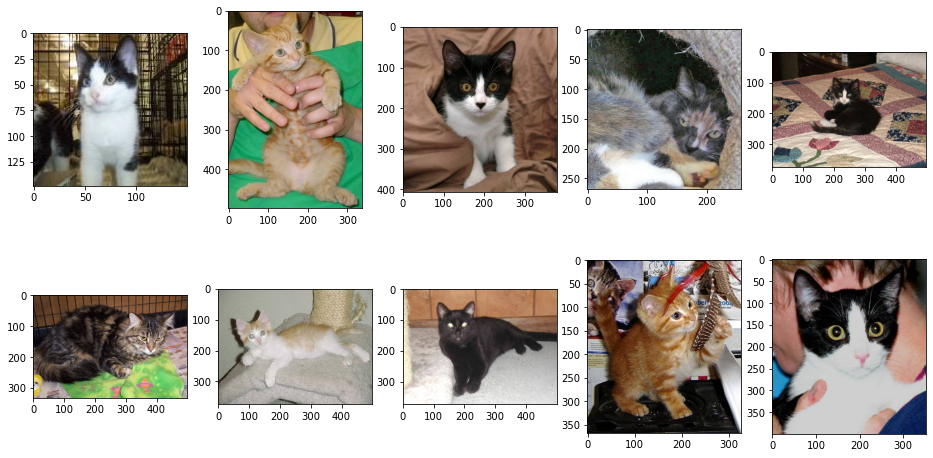

In [8]:
path = []
for i in range(1000,1010):
    url = train_dir_cats + '/cat.'+ str(i) +'.jpg' #PATH OF EACH IMAGE
    path.append(url)
    
plt.figure(figsize=(16,8))
i=1
for elem in path:
    plt.subplot(2,5,i)
    image = mpimg.imread(elem)
    print(f'shape of the image {i} : {image.shape}')
    plt.imshow(image)
    i+=1
plt.show()

### II-2 / Visualisation of dogs images

shape of the image 1 : (375, 499, 3)
shape of the image 2 : (500, 347, 3)
shape of the image 3 : (199, 200, 3)
shape of the image 4 : (166, 220, 3)
shape of the image 5 : (333, 235, 3)
shape of the image 6 : (355, 500, 3)
shape of the image 7 : (500, 499, 3)
shape of the image 8 : (241, 323, 3)
shape of the image 9 : (332, 500, 3)
shape of the image 10 : (479, 500, 3)


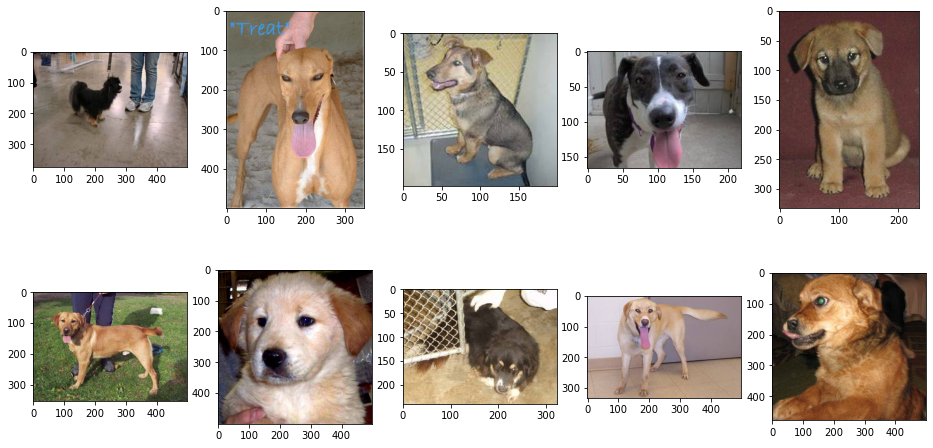

In [9]:
path = []
for i in range(1000,1010):
    url = train_dir_dogs + '/dog.'+ str(i) +'.jpg' #PATH OF EACH IMAGE
    path.append(url)
    
plt.figure(figsize=(16,8))
i=1
for elem in path:
    plt.subplot(2,5,i)
    image = mpimg.imread(elem)
    print(f'shape of the image {i} : {image.shape}')
    plt.imshow(image)
    i+=1
plt.show()

### III / Converting into array
We need to convert our RGB images into an array because our model take arrays as entry data. 
For that we can use a module of the keras library that we will use later. 
The module utils from keras have the function image_dataset_from_directory can automatically take our images 
from our directory and convert them.

In [11]:
# import the libraries needed for the model and preprocessing
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation

In [12]:
#We can make some variabes to pass to our images, like the image_width, image_height and the batch_size
batch_size = 32
img_height = 180
img_width = 180

In [17]:
train_ds = tf.keras.utils.image_dataset_from_directory(train_dir, image_size=(img_height, img_width),batch_size=batch_size)

test_ds = tf.keras.utils.image_dataset_from_directory(test_dir, image_size=(img_height, img_width), batch_size=batch_size)

Found 8000 files belonging to 2 classes.
Found 2000 files belonging to 2 classes.


In [18]:
class_name = train_ds.class_names
print(class_name)

['cats', 'dogs']


### IV / Visualising our data
We can now visualize our data with their class name. for exemple here are the first 9 images of our training set

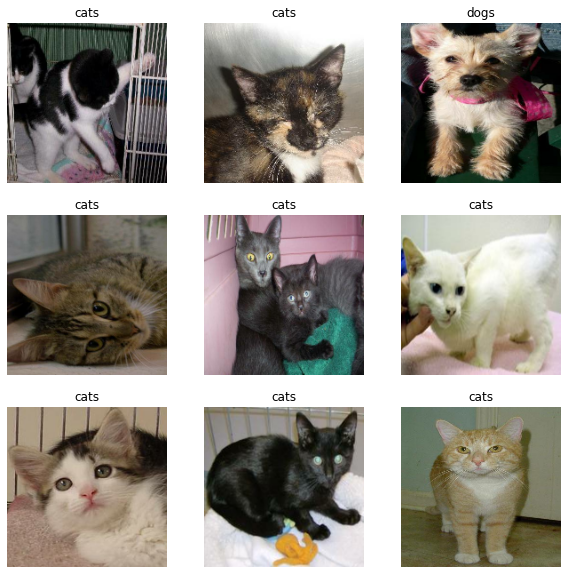

In [33]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

we can see that now, every image have the same shape. A shape that we have defined to be (180,180,3)

### Standardization of our data
We have images with the shape of (180,180,3) that mean that an image is a matrix of dimension (180,180,3) and each value of this matrix can go from 0 to 255. It is not optimal for our neural network to work, for that we need to standardize from [0,255] to [0,1]. We can do that later in our model as a layer of it.

### Creating a flexible pipeline
To have better perfomance we can have a flexible pipeline for ou I/O.

In [41]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# V / Creating our Model
The model We will use is the CNN (Convolutional Neural Network), it works by a sequence of convolutional layer and maxpooling layer with a ReLU (Rectified Linear Unit) Activation function.

The Convolutional layer (Conv2D) will extract useful information from the picture by doing a general processing, with each neuron processing a small area of pixel.

The Max-pooling layer (MaxPooling2D) will reduce the image dimension.

ReLU is an anctivation function, ReLU = 1/(1+exp(-1)).

After 3 to 5 layer of convolution and maxpooling we can use a flatten layer to go from an image to an array with the shape (180x180, ) or (32400,). After the flatten layer the outcome will go throuh 2 to 3 dense layer.

The dense layer is a layer where each from the layer n-1 is connected to every neuron from the layer n. By using the gradient descent algorithm, we can do a backward propagation to recalculate the weight between each neurons.
after the dense layer we have a final dense layer with a softmax activation to give the probabilities meaning.

We can also have some dropout layer to further increase the accuracy of the model.

In [43]:
model = Sequential()
model.add(Rescaling(1./255))
model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.15))
model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Conv2D(filters = 126, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(rate = 0.1))
model.add(Flatten())
model.add(Dense(units = 32, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = 64, activation = 'relu'))
model.add(Dropout(rate = 0.1))
model.add(Dense(units = len(set(class_name)), activation = 'softmax'))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [44]:
model.fit(
    train_ds,
    validation_data= test_ds,
    epochs = 10
)

Epoch 1/10
250/250 [==============================] - 276s 1s/step - loss: 0.6913 - accuracy: 0.5396 - val_loss: 0.6748 - val_accuracy: 0.5890
Epoch 2/10
250/250 [==============================] - 260s 1s/step - loss: 0.6461 - accuracy: 0.6289 - val_loss: 0.6148 - val_accuracy: 0.6750
Epoch 3/10
250/250 [==============================] - 266s 1s/step - loss: 0.5490 - accuracy: 0.7225 - val_loss: 0.5387 - val_accuracy: 0.7270
Epoch 4/10
250/250 [==============================] - 295s 1s/step - loss: 0.4724 - accuracy: 0.7806 - val_loss: 0.5659 - val_accuracy: 0.7260
Epoch 5/10
250/250 [==============================] - 304s 1s/step - loss: 0.4196 - accuracy: 0.8090 - val_loss: 0.5887 - val_accuracy: 0.7485
Epoch 6/10
250/250 [==============================] - 302s 1s/step - loss: 0.3400 - accuracy: 0.8489 - val_loss: 0.6181 - val_accuracy: 0.7420
Epoch 7/10
250/250 [==============================] - 293s 1s/step - loss: 0.3016 - accuracy: 0.8698 - val_loss: 0.6891 - val_accuracy: 0.7420

### We can see we have an accuracy for the training set of 98.4% but for the test set only 73%, we can say we are in overfitting, to counter that we can use more dropout layer or maybe doing some data augmentation to have more data, because only 4000 images for the training is not a lot. If we use data augmentation we could have ~10000 images for our training set

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 89, 89, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                    

### VI / Predicting

In [46]:
def testing_image(image_directory): #testing out our model
    test_image = Image.open(image_directory)
    test_image = test_image.resize((180,180))
    test_image = np.expand_dims(test_image, axis = 0)
    result = model.predict(x = test_image)
    print(result)
    if result[0][0]  >= 0.5:
        prediction = 'Cat'
    else:
        prediction = 'Dog'
    return prediction

In [47]:
print(testing_image(test_dir + '/cat.4999.jpg'))

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/jpadmanabhan/Downloads/imgclass/dog vs cat/dataset/test_set/cat.4999.jpg'

In [ ]:
print(testing_image(test_dir + '/dog.4010.jpg'))